In [1]:
def get_price_and_date(url):
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.support.ui import WebDriverWait
    from selenium.webdriver.support import expected_conditions as EC
    import pandas as pd
    
    
    # Class name of element that contain product name 
    name_loc = 'KmiQIK'
    # Class name of element that contain categories name 
    cat_loc = 'akCPfg'
    # Class name of element that contain price
    price_loc = "div.pqTWkA"

    
    # Create a Chrome web driver
    driver = webdriver.Chrome()

    # Navigate to the product page
    driver.get(url)
    
    # Wait for the page to load
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, name_loc)))
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, cat_loc)))
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, price_loc)))

    
    # Find the element contains name at specific location
    name = driver.find_element_by_class_name(name_loc).text
    cat = driver.find_elements_by_class_name(cat_loc)[3].text
    price_element = driver.find_element_by_css_selector(price_loc)

    # Extract the price text and remove the currency symbol
    price_text = "".join([c for c in price_element.text if c.isdigit() or c in [".", "-"]])

    # Convert the price text to a number
    price = price_text
    
    
    # Get the current date and time
    date = pd.Timestamp.now()
    # Transform to 'YYYY-MM-DD'
    date = date.strftime('%Y-%m-%d')

    # Create a DataFrame with the price and date
    df = pd.DataFrame({"product_name":[name], "category":[cat],"price": [price], "date": [date], "url":[url]})

    # Append the new row to the existing DataFrame
    try:
        # import existing CSV file
        df_existing = pd.read_csv("prices.csv")
        # Combine new DataFrame to existed DataFrame
        df_combined = df_existing.append(df, ignore_index=True)

        # Save the combined DataFrame to the CSV file
        df_combined.to_csv("prices.csv", index=False)
    except:
        df.to_csv("prices.csv", index=False)
#         df_existing = pd.read_csv("prices.csv")


    # Close the web driver
    driver.close()


# One Time Run

In [2]:
# url webpage of product
url_dict = {
"home_huk_gaming_chair":"https://shopee.co.th/HomeHuk-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B9%80%E0%B8%81%E0%B8%A1%E0%B8%A1%E0%B8%B4%E0%B9%88%E0%B8%87-%E0%B8%A3%E0%B8%B8%E0%B9%88%E0%B8%99-Arashi-%E0%B9%80%E0%B8%9A%E0%B8%B2%E0%B8%B0%E0%B8%9C%E0%B9%89%E0%B8%B2-%E0%B8%82%E0%B8%AD%E0%B8%9A%E0%B8%AB%E0%B8%99%E0%B8%B1%E0%B8%87-%E0%B8%AB%E0%B8%99%E0%B8%B2%E0%B8%9E%E0%B8%B4%E0%B9%80%E0%B8%A8%E0%B8%A9-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%9E%E0%B8%B1%E0%B8%81%E0%B9%81%E0%B8%82%E0%B8%99-%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%9A-2-%E0%B8%97%E0%B8%B4%E0%B8%A8%E0%B8%97%E0%B8%B2%E0%B8%87-%E0%B8%9E%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%9E%E0%B8%B4%E0%B8%87%E0%B8%AA%E0%B8%B9%E0%B8%87-%E0%B9%80%E0%B8%AD%E0%B8%99-90-135%C2%B0-%E0%B8%A5%E0%B9%87%E0%B8%AD%E0%B8%84%E0%B9%84%E0%B8%94%E0%B9%89-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B8%84%E0%B8%AD%E0%B8%A1-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B8%84%E0%B8%AD%E0%B8%A1%E0%B8%9E%E0%B8%B4%E0%B8%A7%E0%B9%80%E0%B8%95%E0%B8%AD%E0%B8%A3%E0%B9%8C-Fabric-Gaming-Chair-2D-Armrest-with-Double-Tilt-i.8716640.836140800?sp_atk=cac78744-047a-4f6c-b186-21bac677b668&xptdk=cac78744-047a-4f6c-b186-21bac677b668",
"east_seat_gaming_chair":"https://shopee.co.th/%F0%9D%99%80%F0%9D%98%BC%F0%9D%99%8E%F0%9D%99%8F-%F0%9D%99%8E%F0%9D%99%80%F0%9D%98%BC%F0%9D%99%8F-%E0%B8%A3%E0%B8%B8%E0%B9%88%E0%B8%99-%F0%9D%97%A3%F0%9D%97%A5%F0%9D%97%A2-%F0%9D%97%A6%F0%9D%97%B2%F0%9D%97%BF%F0%9D%97%B6%F0%9D%97%B2%F0%9D%98%80-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B9%80%E0%B8%81%E0%B8%A1%E0%B8%A1%E0%B8%B4%E0%B9%88%E0%B8%87-%E0%B9%80%E0%B8%AD%E0%B8%99%E0%B9%84%E0%B8%94%E0%B9%89-150-%E0%B8%AD%E0%B8%87%E0%B8%A8%E0%B8%B2-%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%9E%E0%B8%B1%E0%B8%81%E0%B9%81%E0%B8%82%E0%B8%99-%E0%B8%A1%E0%B8%B5%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%A3%E0%B8%AD%E0%B8%87%E0%B8%82%E0%B8%B2-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B9%80%E0%B8%81%E0%B8%A1%E0%B9%80%E0%B8%A1%E0%B8%AD-i.46571268.3693123020?sp_atk=088539cd-6829-49d8-a1cb-4f0c477bff84&xptdk=088539cd-6829-49d8-a1cb-4f0c477bff84" ,
'home_huk_office_chair':'https://shopee.co.th/HomeHuk-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B8%97%E0%B8%B3%E0%B8%87%E0%B8%B2%E0%B8%99-%E0%B8%A3%E0%B8%B8%E0%B9%88%E0%B8%99-Chicago-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%A3%E0%B8%AD%E0%B8%87%E0%B8%A8%E0%B8%B5%E0%B8%A3%E0%B8%A9%E0%B8%B0%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B9%84%E0%B8%94%E0%B9%89-3-%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A-%E0%B8%9E%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%9E%E0%B8%B4%E0%B8%87%E0%B8%9C%E0%B9%89%E0%B8%B2%E0%B8%95%E0%B8%B2%E0%B8%82%E0%B9%88%E0%B8%B2%E0%B8%A2-%E0%B8%A3%E0%B8%B9%E0%B8%9B%E0%B8%95%E0%B8%B1%E0%B8%A7-S-%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%AA%E0%B8%A3%E0%B8%B5%E0%B8%A3%E0%B8%B0-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B8%AD%E0%B8%AD%E0%B8%9F%E0%B8%9F%E0%B8%B4%E0%B8%A8-Mesh-Back-Office-Chair-with-Head-Support-i.8716640.787482553?xptdk=fda3b329-6ff3-4500-9350-8cce9137f777'
,'acer_desktop_monitor_23.8_inch_EK240YCbi':'https://shopee.co.th/ACER-Monitor-%E0%B8%88%E0%B8%AD%E0%B8%84%E0%B8%AD%E0%B8%A1%E0%B8%9E%E0%B8%B4%E0%B8%A7%E0%B9%80%E0%B8%95%E0%B8%AD%E0%B8%A3%E0%B9%8C-23.8''-EK240YCbi-(VA-VGA-HDMI)-75Hz-i.62824618.12531693615?sp_atk=42f58d91-cbf8-47e7-ae38-33dcd238ddfa&xptdk=42f58d91-cbf8-47e7-ae38-33dcd238ddfa'
,'acer_desktop_monitor_23.8_inch_SA241YAbi':'https://shopee.co.th/ACER-Monitor-%E0%B8%88%E0%B8%AD%E0%B8%84%E0%B8%AD%E0%B8%A1%E0%B8%9E%E0%B8%B4%E0%B8%A7%E0%B9%80%E0%B8%95%E0%B8%AD%E0%B8%A3%E0%B9%8C-23.8''-SA241YAbi-(VA-VGA-HDMI)-75Hz-i.62824618.15662924343?xptdk=54a41381-2533-4abb-8b52-cfc23a12a8c8'
,'ipason_desktop_monitor_27_inch':'https://shopee.co.th/IPASON-Monitor-%E0%B8%A3%E0%B8%B8%E0%B9%88%E0%B8%99-E272-27-FHD-75-Hz-%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%81%E0%B8%B1%E0%B8%99-3-%E0%B8%9B%E0%B8%B5-%E0%B9%82%E0%B8%94%E0%B8%A2-Devas-IPASON-i.20947841.20664135980?sp_atk=25611988-5b12-4634-937b-4761bc1ff7a5&utm_campaign=-&utm_content=----&utm_medium=affiliates&utm_source=an_15162270000&utm_term=8kawnngrnzdd&xptdk=25611988-5b12-4634-937b-4761bc1ff7a5'
,'homehero_office_chair':'https://shopee.co.th/HomeHero-%E0%B9%80%E0%B8%81%E0%B9%89%E0%B8%B2%E0%B8%AD%E0%B8%B5%E0%B9%89%E0%B8%AA%E0%B8%B3%E0%B8%99%E0%B8%B1%E0%B8%81%E0%B8%87%E0%B8%B2%E0%B8%99-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B8%A3%E0%B8%AD%E0%B8%87%E0%B8%A8%E0%B8%B5%E0%B8%A3%E0%B8%A9%E0%B8%B0-3-%E0%B8%A3%E0%B8%B0%E0%B8%94%E0%B8%B1%E0%B8%9A-%E0%B8%9B%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B8%AA%E0%B8%B9%E0%B8%87-113-121-cm-%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%AA%E0%B8%A3%E0%B8%B5%E0%B8%A3%E0%B8%B0-%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%99%E0%B9%89%E0%B8%B3%E0%B8%AB%E0%B8%99%E0%B8%B1%E0%B8%81-150kg-i.163081637.2522291497'
}

In [3]:
for name, url in url_dict.items():
    get_price_and_date(url)
    print(name + " : DONE")

home_huk_gaming_chair : DONE
east_seat_gaming_chair : DONE
home_huk_office_chair : DONE
acer_desktop_monitor_23.8_inch_EK240YCbi : DONE
acer_desktop_monitor_23.8_inch_SA241YAbi : DONE
ipason_desktop_monitor_27_inch : DONE
homehero_office_chair : DONE


In [4]:
import pandas as pd
# pd.set_option('display.max_colwidth', None) 
df = pd.read_csv('prices.csv')

# Swap keys and values in dict
swop_dict = dict((v,k) for k,v in url_dict.items())

# Replace values in columns with dictionary
df.product_name = df.url.replace(swop_dict)
df.tail(10)

,product_name,category,price,date,url
151,acer_desktop_monitor_23.8_inch_SA241YAbi,จอมอนิเตอร์,3542,2023-01-28,https://shopee.co.th/ACER-Monitor-%E0%B8%88%E0...
152,ipason_desktop_monitor_27_inch,จอมอนิเตอร์,3580,2023-01-28,https://shopee.co.th/IPASON-Monitor-%E0%B8%A3%...
153,homehero_office_chair,เก้าอี้ทำงาน,1399,2023-01-28,https://shopee.co.th/HomeHero-%E0%B9%80%E0%B8%...
154,home_huk_gaming_chair,Gaming Chair,5590-6990,2023-01-29,https://shopee.co.th/HomeHuk-%E0%B9%80%E0%B8%8...
155,east_seat_gaming_chair,Gaming Chair,3490,2023-01-29,https://shopee.co.th/%F0%9D%99%80%F0%9D%98%BC%...
156,home_huk_office_chair,เก้าอี้ทำงาน,2049,2023-01-29,https://shopee.co.th/HomeHuk-%E0%B9%80%E0%B8%8...
157,acer_desktop_monitor_23.8_inch_EK240YCbi,จอมอนิเตอร์,3790,2023-01-29,https://shopee.co.th/ACER-Monitor-%E0%B8%88%E0...
158,acer_desktop_monitor_23.8_inch_SA241YAbi,จอมอนิเตอร์,3542,2023-01-29,https://shopee.co.th/ACER-Monitor-%E0%B8%88%E0...
159,ipason_desktop_monitor_27_inch,จอมอนิเตอร์,3580,2023-01-29,https://shopee.co.th/IPASON-Monitor-%E0%B8%A3%...
160,homehero_office_chair,เก้าอี้ทำงาน,1399,2023-01-29,https://shopee.co.th/HomeHero-%E0%B9%80%E0%B8%...


In [5]:
# Make a copy of .CSV file outside project directory for protecting data in .CSV file
# unintentionally change by Git.
import pandas as pd
prices_df = pd.read_csv('prices.csv')
prices_df.to_csv(r'C:\Users\acer\OneDrive\Desktop\github\shopee\copy_of_prices.csv')

In [6]:
#Manual Run
# get_price_and_date(url_dict['homehero_office_chair'])

# Run Everyday

```
import time

while True:
    get_price_and_date(url, price_loc)
    
    # Wait for one day
    time.sleep(86400)
```

# Cleaning data

In [7]:
# remove dupllicate rows with same 'product_name' and 'date'
df.drop_duplicates(subset=['product_name', 'date'], keep='last')

# repalce '3000-4000' with '3000' 
df.price = df.price.replace(to_replace='-\d+', value='',regex=True)

# tranform 'price' column into numeric
df.price = df.price.astype('int64')

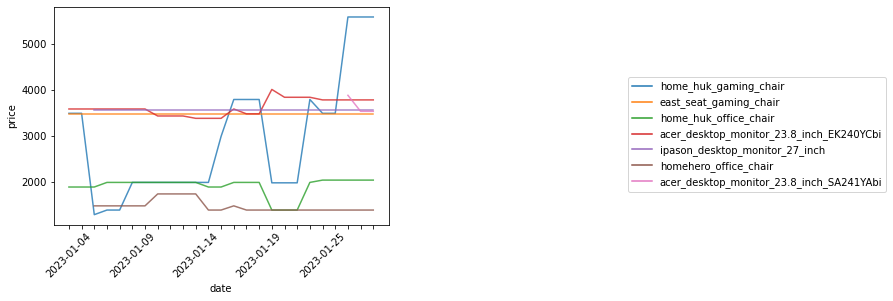

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot line show timeline of price of each products
plot_ = sns.lineplot(data=df, x='date', y='price', hue='product_name', alpha=0.8)

# Reduce the dendity of x-ticks
for ind, label in enumerate(plot_.get_xticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
        
# Rotation X tick
plt.xticks(rotation=45)


# Specify legend position
plt.legend(bbox_to_anchor=(1.7, 0.7))
plt.show()

```
# Edit prodcut name due to add same product which different model code
target = df.product_name=='acer_desktop_monitor_23.8_inch'

df.loc[target, 'product_name'] = 'acer_desktop_monitor_23.8_inch_EK240YCbi'

```